In [1]:
# Import the dependencies.
from config import weather_api_key
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import requests

from citipy import citipy
from datetime import datetime

## Latitude-Longitude

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

612

## Get the City Weather Data

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S') 

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sabha
Processing Record 2 of Set 1 | guerrero negro
Processing Record 3 of Set 1 | ponta do sol
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | toora-khem
Processing Record 10 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 1 | juneau
Processing Record 12 of Set 1 | viedma
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | pochutla
Processing Record 18 of Set 1 | pueblo
Processing Record 19 of Set 1 | bonthe
Processing Record 20 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 21 of Set 1 | caravelas
Processing Recor

Processing Record 36 of Set 4 | avarua
Processing Record 37 of Set 4 | pevek
Processing Record 38 of Set 4 | neuquen
Processing Record 39 of Set 4 | bella union
Processing Record 40 of Set 4 | barkly west
Processing Record 41 of Set 4 | tala
Processing Record 42 of Set 4 | pervomayskiy
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | batagay-alyta
Processing Record 45 of Set 4 | toliary
City not found. Skipping...
Processing Record 46 of Set 4 | port lincoln
Processing Record 47 of Set 4 | yangambi
Processing Record 48 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 49 of Set 4 | ustka
Processing Record 50 of Set 4 | hovd
Processing Record 1 of Set 5 | avera
Processing Record 2 of Set 5 | fort nelson
Processing Record 3 of Set 5 | nizwa
Processing Record 4 of Set 5 | ewa beach
Processing Record 5 of Set 5 | otradnoye
Processing Record 6 of Set 5 | ponta delgada
Processing Record 7 of Set 5 | victoria point
Processing Record 8 of Set 5 | p

Processing Record 28 of Set 8 | trinidad
Processing Record 29 of Set 8 | pacifica
Processing Record 30 of Set 8 | oktyabrskiy
Processing Record 31 of Set 8 | huetamo
City not found. Skipping...
Processing Record 32 of Set 8 | rathcoole
Processing Record 33 of Set 8 | umm jarr
City not found. Skipping...
Processing Record 34 of Set 8 | homer
Processing Record 35 of Set 8 | bundaberg
Processing Record 36 of Set 8 | najran
Processing Record 37 of Set 8 | atambua
Processing Record 38 of Set 8 | razole
Processing Record 39 of Set 8 | kidal
Processing Record 40 of Set 8 | saint-francois
Processing Record 41 of Set 8 | hammerfest
Processing Record 42 of Set 8 | kupang
Processing Record 43 of Set 8 | meiganga
Processing Record 44 of Set 8 | seguin
Processing Record 45 of Set 8 | katha
City not found. Skipping...
Processing Record 46 of Set 8 | innisfail
Processing Record 47 of Set 8 | afua
Processing Record 48 of Set 8 | bolshaya glushitsa
Processing Record 49 of Set 8 | alice springs
Processi

Processing Record 15 of Set 12 | diego de almagro
Processing Record 16 of Set 12 | metro
Processing Record 17 of Set 12 | hakui
Processing Record 18 of Set 12 | presidencia roque saenz pena
Processing Record 19 of Set 12 | kamoke
Processing Record 20 of Set 12 | muswellbrook
Processing Record 21 of Set 12 | kinsale
Processing Record 22 of Set 12 | cacule
Processing Record 23 of Set 12 | manggar
Processing Record 24 of Set 12 | dubovskoye
Processing Record 25 of Set 12 | bandarbeyla
Processing Record 26 of Set 12 | rockland
Processing Record 27 of Set 12 | cozumel
Processing Record 28 of Set 12 | dina
Processing Record 29 of Set 12 | dengfeng
Processing Record 30 of Set 12 | port loko
Processing Record 31 of Set 12 | tabory
Processing Record 32 of Set 12 | duki
Processing Record 33 of Set 12 | selty
Processing Record 34 of Set 12 | seoul
Processing Record 35 of Set 12 | lamu
Processing Record 36 of Set 12 | edd
Processing Record 37 of Set 12 | dekar
Processing Record 38 of Set 12 | meha

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sabha,27.0377,14.4283,62.37,52,26,8.23,LY,2022-11-28 18:24:08
1,Guerrero Negro,27.9769,-114.0611,67.41,58,25,9.22,MX,2022-11-28 18:24:09
2,Ponta Do Sol,32.6667,-17.1000,70.72,78,35,9.08,PT,2022-11-28 18:24:09
3,Mataura,-46.1927,168.8643,50.79,81,99,1.52,NZ,2022-11-28 18:24:10
4,Ancud,-41.8697,-73.8203,61.50,72,37,12.73,CL,2022-11-28 18:24:10
5,Port Alfred,-33.5906,26.8910,68.18,79,69,10.00,ZA,2022-11-28 18:24:10
6,Hermanus,-34.4187,19.2345,72.81,66,77,10.69,ZA,2022-11-28 18:24:11
7,Port Elizabeth,-33.9180,25.5701,70.11,81,20,23.02,ZA,2022-11-28 18:24:11
8,Toora-Khem,52.4675,96.1100,-8.95,98,100,0.72,RU,2022-11-28 18:24:11
9,Juneau,58.3019,-134.4197,20.10,100,60,6.60,US,2022-11-28 18:22:05


In [21]:
# Reorder Columns
new_column_order = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df = new_column_order

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sabha,LY,2022-11-28 18:24:08,27.0377,14.4283,62.37,52,26,8.23
1,Guerrero Negro,MX,2022-11-28 18:24:09,27.9769,-114.0611,67.41,58,25,9.22
2,Ponta Do Sol,PT,2022-11-28 18:24:09,32.6667,-17.1000,70.72,78,35,9.08
3,Mataura,NZ,2022-11-28 18:24:10,-46.1927,168.8643,50.79,81,99,1.52
4,Ancud,CL,2022-11-28 18:24:10,-41.8697,-73.8203,61.50,72,37,12.73
...,...,...,...,...,...,...,...,...,...
557,Chara,RU,2022-11-28 18:39:44,56.9064,118.2631,-21.26,84,100,1.66
558,Grindavik,IS,2022-11-28 18:39:45,63.8424,-22.4338,35.55,86,75,13.80
559,Culpeper,US,2022-11-28 18:39:45,38.5004,-77.9664,56.75,53,75,10.36
560,Teguise,ES,2022-11-28 18:39:45,29.0605,-13.5640,66.42,78,20,18.41


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1[Plot Latitude vs. Temperature](https://courses.bootcampspot.com/courses/2523/pages/6-dot-3-1-plot-latitude-vs-temperature?module_item_id=806262)

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

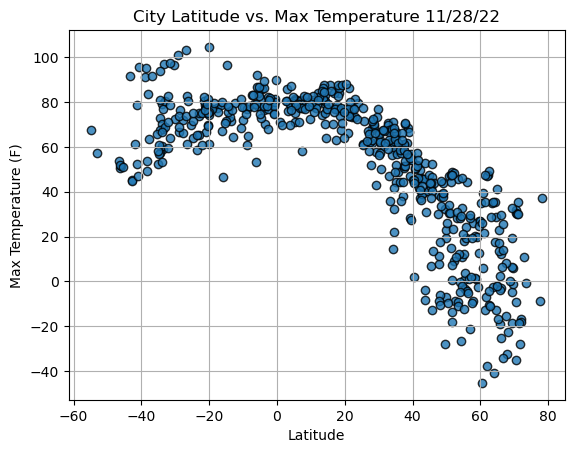

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

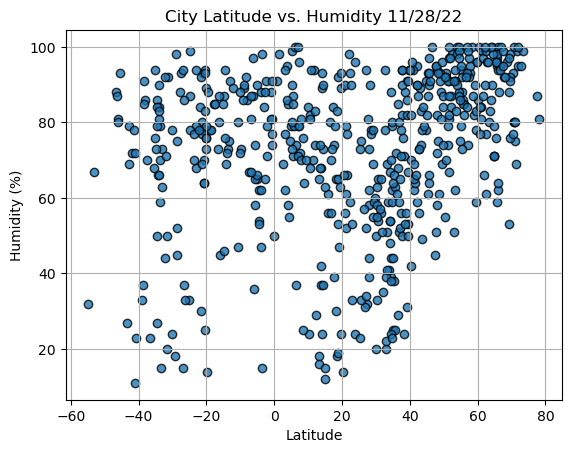

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


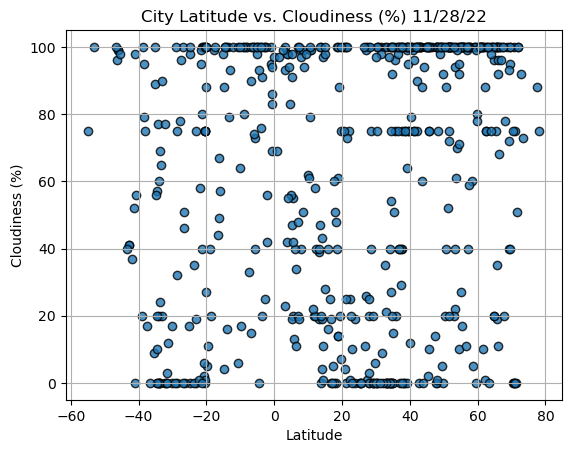

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

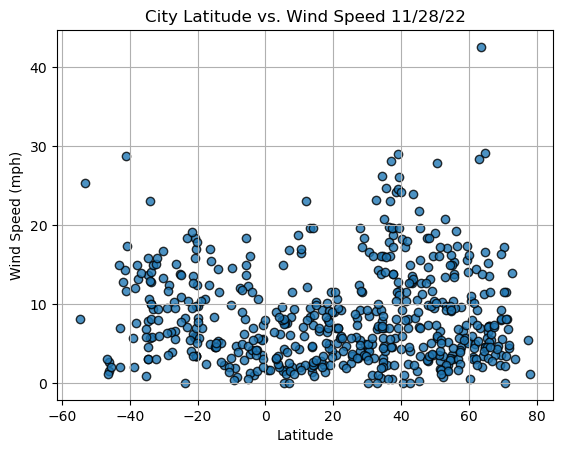

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()